In [1]:
import os
os.chdir('../../..')

In [5]:
import convokit

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

First we download the reddit corpus:

In [30]:
corpus = convokit.Corpus(filename="convokit/thread_generator/fake-corpus-trajectory-40")

In [31]:
corpus.print_summary_stats()

Number of Users: 200
Number of Utterances: 39960
Number of Conversations: 999


In [32]:
len(list(corpus.random_conversation().iter_utterances()))

40

In [33]:
# create a hyperconvo object and use it to extract features
hc = convokit.HyperConvo(prefix_len=20)
hc.fit_transform(corpus)

In [34]:
convo1 = corpus.random_conversation()
print(convo1.id)
convo1.meta['hyperconvo']

958-1


{'max[indegree over c->c responses]': 3,
 'argmax[indegree over c->c responses]': 6,
 'norm.max[indegree over c->c responses]': 0.15789473684210525,
 '2nd-largest[indegree over c->c responses]': 2,
 '2nd-argmax[indegree over c->c responses]': 10,
 'norm.2nd-largest[indegree over c->c responses]': 0.10526315789473684,
 'mean[indegree over c->c responses]': 0.95,
 'mean-nonzero[indegree over c->c responses]': 1.1875,
 'prop-nonzero[indegree over c->c responses]': 0.8,
 'prop-multiple[indegree over c->c responses]': 0.125,
 'entropy[indegree over c->c responses]': 2.698011019844113,
 '2nd-largest / max[indegree over c->c responses]': 0.6666666666666666,
 'max[outdegree over C->c responses]': 6,
 'max[indegree over C->c responses]': 3,
 'argmax[outdegree over C->c responses]': 0,
 'argmax[indegree over C->c responses]': 6,
 'norm.max[outdegree over C->c responses]': 0.3157894736842105,
 'norm.max[indegree over C->c responses]': 0.15789473684210525,
 '2nd-largest[outdegree over C->c respons

In [35]:
from convokit import Classifier

In [55]:
doubled = 0
for convo in corpus.iter_conversations():
    utts40 = convo.get_chronological_utterance_list()
    utts20 = utts40[:20]
    num_users_20 = len(set(utt.user.id for utt in utts20))
    num_users_40 = len(set(utt.user.id for utt in utts40))
    convo.meta['doubled'] = (num_users_40 / num_users_20 >= 1.5)

In [60]:
corpus.random_conversation().meta['hyperconvo']

{'max[indegree over c->c responses]': 2,
 'argmax[indegree over c->c responses]': 1,
 'norm.max[indegree over c->c responses]': 0.10526315789473684,
 '2nd-largest[indegree over c->c responses]': 2,
 '2nd-argmax[indegree over c->c responses]': 3,
 'norm.2nd-largest[indegree over c->c responses]': 0.10526315789473684,
 'mean[indegree over c->c responses]': 0.95,
 'mean-nonzero[indegree over c->c responses]': 1.1176470588235294,
 'prop-nonzero[indegree over c->c responses]': 0.85,
 'prop-multiple[indegree over c->c responses]': 0.11764705882352941,
 'entropy[indegree over c->c responses]': 2.798513256943294,
 '2nd-largest / max[indegree over c->c responses]': 1.0,
 'max[outdegree over C->c responses]': 9,
 'max[indegree over C->c responses]': 2,
 'argmax[outdegree over C->c responses]': 0,
 'argmax[indegree over C->c responses]': 1,
 'norm.max[outdegree over C->c responses]': 0.47368421052631576,
 'norm.max[indegree over C->c responses]': 0.10526315789473684,
 '2nd-largest[outdegree over 

In [58]:
clf = Classifier(obj_type="conversation", pred_feats=["hyperconvo"], labeller=lambda convo: convo.meta['doubled'])

In [59]:
clf.fit_transform(corpus)

TypeError: no supported conversion for types: (dtype('O'),)

Here are some examples of features computed over the three example threads from before:

In [27]:
C_C_indegree_feats = [x for x in feat_names if 'indegree over C->C responses' in x]
C_C_mid_outdegree_feats = [x for x in feat_names if 'outdegree over C->C mid-thread responses' in x]
motif_count_feats = [x for x in feat_names if ('count' in x) and ('mid' not in x)]

Features derived from the distribution of hypernode to hypernode indegrees (i.e., "how many other people are responding to a particular discussion participant?"). As in the paper, we compute various summary statistics over the distribution. 

As noted at the start of this notebook, since we do not have access to reaction information, these distributions encompass only the reply structure within the thread.

In [28]:
feat_df.loc[demo_threads][C_C_indegree_feats].T.sort_index()

e57u6ft   e56rtrx
2nd-argmax[indegree over C->C responses]         1.000000  1.000000
2nd-largest / max[indegree over C->C responses]  0.400000  0.800000
2nd-largest[indegree over C->C responses]        2.000000  4.000000
argmax[indegree over C->C responses]             0.000000  0.000000
entropy[indegree over C->C responses]            1.149060  0.686962
max[indegree over C->C responses]                5.000000  5.000000
mean-nonzero[indegree over C->C responses]       2.250000  4.500000
mean[indegree over C->C responses]               1.500000  4.500000
norm.2nd-largest[indegree over C->C responses]   0.222222  0.444444
norm.max[indegree over C->C responses]           0.555556  0.555556
prop-multiple[indegree over C->C responses]      0.500000  1.000000
prop-nonzero[indegree over C->C responses]       0.666667  1.000000

Features derived from the distribution of hypernode to hypernode outdegrees in the _middle_ of the thread (i.e., "beyond the root comment, how many other people is each participant responding to?"). 

In [29]:
feat_df.loc[demo_threads][C_C_mid_outdegree_feats].T.sort_index()

e57u6ft   e56rtrx
2nd-argmax[outdegree over C->C mid-thread respo...  0.000000  1.000000
2nd-largest / max[outdegree over C->C mid-threa...  0.500000  1.000000
2nd-largest[outdegree over C->C mid-thread resp...  1.000000  4.000000
argmax[outdegree over C->C mid-thread responses]    3.000000  0.000000
entropy[outdegree over C->C mid-thread responses]   1.560710  0.693147
max[outdegree over C->C mid-thread responses]       2.000000  4.000000
mean-nonzero[outdegree over C->C mid-thread res...  1.200000  4.000000
mean[outdegree over C->C mid-thread responses]      1.000000  4.000000
norm.2nd-largest[outdegree over C->C mid-thread...  0.166667  0.500000
norm.max[outdegree over C->C mid-thread responses]  0.333333  0.500000
prop-multiple[outdegree over C->C mid-thread re...  0.200000  1.000000
prop-nonzero[outdegree over C->C mid-thread res...  0.833333  1.000000

Features derived from the 5 motifs considered in the paper. Note that because we do not have reply information, we instead take as features _counts_ of each motif (in the paper, we would additionally compare reply or reaction edge types within motifs of a particular form)

In [30]:
feat_df.loc[demo_threads][motif_count_feats].T.sort_index()

e57u6ft  e56rtrx
count[dyadic interaction motif]          3        1
count[external reciprocity motif]        3        0
count[incoming triads]                   7        0
count[outgoing triads]                  18       20
count[reciprocity motif]                 3        8

While the features generated above can be used as is (e.g., as features in a prediction task), we can also interpret them by projecting them into a low-dimensional space. 

In [31]:
from sklearn.preprocessing import Imputer, Normalizer, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances

In [32]:
feat_mtx = Imputer(axis=1, missing_values=-1).fit_transform(feat_df.values)
feat_mtx = StandardScaler().fit_transform(feat_mtx)

In [33]:
svd = TruncatedSVD(n_components=7, algorithm='arpack') # deals with an issue where the randomized alg hangs
svd.fit(feat_mtx)
U, s, V = svd.transform(feat_mtx) / svd.singular_values_, \
        svd.singular_values_, \
        svd.components_.T

In [34]:
U_norm = Normalizer().fit_transform(U)
V_norm = Normalizer().fit_transform(V)
U_df = pd.DataFrame(data=U_norm, index=feat_df.index)
V_df = pd.DataFrame(data=V_norm, index=feat_names)

This embedding procedure produces embeddings of threads in the low-dimensional space:

In [35]:
U_df.loc[demo_threads].T

e57u6ft   e56rtrx
0 -0.034099  0.733438
1 -0.265653  0.352118
2 -0.405534  0.227085
3 -0.222303 -0.112990
4  0.771678  0.351877
5 -0.045388 -0.130505
6  0.341822 -0.364553

As well as embeddings of features:

In [36]:
V_df.loc[C_C_indegree_feats]

0         1         2  \
max[indegree over C->C responses]               -0.055544  0.839171  0.197350   
argmax[indegree over C->C responses]             0.059291 -0.474964  0.474167   
norm.max[indegree over C->C responses]          -0.055544  0.839171  0.197350   
2nd-largest[indegree over C->C responses]        0.472225 -0.255982  0.603947   
2nd-argmax[indegree over C->C responses]        -0.138842  0.135197 -0.334288   
norm.2nd-largest[indegree over C->C responses]   0.306986  0.216034  0.586257   
mean[indegree over C->C responses]               0.670279  0.521633  0.393448   
mean-nonzero[indegree over C->C responses]       0.185094  0.749834  0.629031   
prop-nonzero[indegree over C->C responses]       0.867895 -0.152164 -0.446554   
prop-multiple[indegree over C->C responses]      0.310993  0.225811  0.752520   
entropy[indegree over C->C responses]           -0.110386 -0.787161 -0.482655   
2nd-largest / max[indegree over C->C responses]  0.306180 -0.240078  0.506923   

                                                        3             4  \
max[indegree over C->C responses]               -0.496885 -2.133876e-15   
argmax[indegree over C->C responses]            -0.334087 -2.311604e-14   
norm.max[indegree over C->C responses]          -0.496885 -2.028184e-15   
2nd-largest[indegree over C->C responses]        0.037122  2.092752e-14   
2nd-argmax[indegree over C->C responses]         0.247118  3.359749e-14   
norm.2nd-largest[indegree over C->C responses]   0.266074  3.128038e-14   
mean[indegree over C->C responses]               0.079608  1.665525e-14   
mean-nonzero[indegree over C->C responses]       0.025237 -3.277015e-15   
prop-nonzero[indegree over C->C responses]      -0.010522 -8.141677e-15   
prop-multiple[indegree over C->C responses]      0.274887 -6.734091e-16   
entropy[indegree over C->C responses]            0.345522  1.848741e-16   
2nd-largest / max[indegree over C->C responses]  0.544705  2.576488e-14   

                                                        5         6  
max[indegree over C->C responses]                0.022327 -0.079794  
argmax[indegree over C->C responses]             0.476415 -0.455493  
norm.max[indegree over C->C responses]           0.022327 -0.079794  
2nd-largest[indegree over C->C responses]       -0.473515  0.348037  
2nd-argmax[indegree over C->C responses]        -0.703427  0.542973  
norm.2nd-largest[indegree over C->C responses]  -0.665728 -0.037447  
mean[indegree over C->C responses]              -0.338914 -0.051221  
mean-nonzero[indegree over C->C responses]       0.084582  0.004222  
prop-nonzero[indegree over C->C responses]       0.154860  0.010074  
prop-multiple[indegree over C->C responses]      0.063806  0.454282  
entropy[indegree over C->C responses]            0.021912 -0.123978  
2nd-largest / max[indegree over C->C responses] -0.528909  0.123275

In [37]:
convo1.meta

{'original_convo_meta': {'title': 'FUCK YOU NETFLIX STOP CUTTING OFF THE CREDITS',
  'num_comments': 3404,
  'domain': 'self.movies',
  'timestamp': 1536309827,
  'subreddit': 'movies',
  'gilded': 2,
  'gildings': {'gid_1': 0, 'gid_2': 2, 'gid_3': 0},
  'stickied': False,
  'author_flair_text': ''},
 'original_convo_id': '9dsd2r',
 'hyperconvo': {'max[outdegree over c->c responses]': 1,
  'max[indegree over c->c responses]': 5,
  'argmax[outdegree over c->c responses]': 1,
  'argmax[indegree over c->c responses]': 0,
  'norm.max[outdegree over c->c responses]': 0.1111111111111111,
  'norm.max[indegree over c->c responses]': 0.5555555555555556,
  '2nd-largest[outdegree over c->c responses]': 1,
  '2nd-largest[indegree over c->c responses]': 1,
  '2nd-argmax[outdegree over c->c responses]': 2,
  '2nd-argmax[indegree over c->c responses]': 2,
  'norm.2nd-largest[outdegree over c->c responses]': 0.1111111111111111,
  'norm.2nd-largest[indegree over c->c responses]': 0.1111111111111111,
  

As in the paper, for further interpretability we can consider embeddings of _communities_ (subreddits, standing for Facebook pages) in terms of the discussions they foster, by averaging the embeddings of all threads in a particular subreddit.

In [38]:
subreddits = [convo.meta['original_convo_meta']['subreddit'] for convo in threads_corpus.iter_conversations()]

In [39]:
len(subreddits)

10000

In [40]:
U_df['subreddit'] = subreddits

In [41]:
subreddit_means = U_df.groupby('subreddit').mean()
subreddit_df = pd.DataFrame(
        data=Normalizer().fit_transform(subreddit_means.values),
        index = subreddit_means.index
    )

First, let's give a rough overview of the space we've sketched out through this procedure, by visualizing the subreddit embeddings using the TSNE algorithm.

In [42]:
tsne = TSNE(random_state=2018)
tsne_df = pd.DataFrame(data=tsne.fit_transform(subreddit_df.values),
                      index=subreddit_df.index)

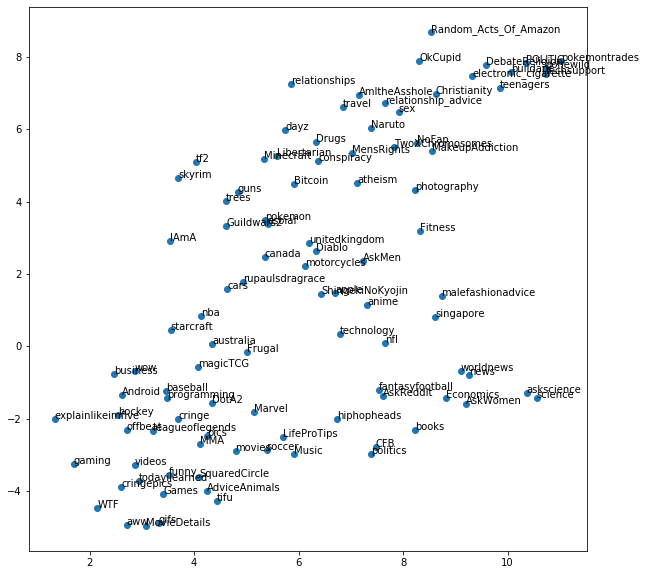

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(tsne_df[0].values, tsne_df[1].values)
for i, txt in enumerate(tsne_df.index):
    plt.annotate(txt, (tsne_df.values[i,0], tsne_df.values[i,1]))
plt.show()

Looking across this plot, we can spot a few interpretable-looking groupings:

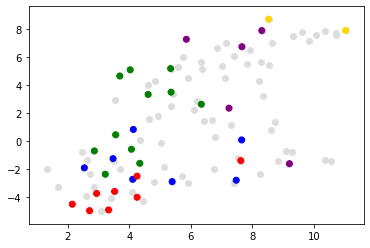

In [44]:
games = ["battlefield3", "Diablo", "DotA2", "Guildwars2", "leagueoflegends", "magicTCG", "Minecraft", "pokemon", "skyrim", "starcraft", "tf2", "wow"]
trade = ["Dota2Trade", "pokemontrades", "SteamGameSwap", "tf2trade", "Random_Acts_Of_Amazon"]
sports = ["baseball", "CFB", "hockey", "MMA", "nba", "nfl", "soccer"]

link_aggregators = ["AskReddit", "WTF", "pics", "gifs", "aww", "funny", "todayilearned",
                   "AdviceAnimals"]
relationships = ["AskMen", "AskWomen", "relationships", "relationship_advice", "OkCupid"]

plt.scatter(tsne_df[0].values, tsne_df[1].values, color="#dddddd")
plt.scatter(tsne_df[0].values, tsne_df[1].values, color=[
    "green" if l in games else
    "gold" if l in trade else
    "purple" if l in relationships else
    "red" if l in link_aggregators else
    "blue" if l in sports else
    "#00000000"
    for l in tsne_df.index])
plt.show()

For instance, video games (e.g., tf2, DotA2; red) tend to group together, along with buy-sell subreddits (e.g., tf2trade, Dota2Trade, yellow), subreddits related to relationships (e.g., AskWomen, relationship_advice; green) and large default-subreddit hubs for sharing random links (e.g., pics, AskReddit; purple).

There may be other interesting groupings that you may spot as well -- for instance, a vaguely right-wing MensRights cluster (with Libertarian, guns); a rather intriguing cluster consisting of politics, sex, business, etc.

Some topical groups are more diffuse -- for instance, sports-based subreddits (blue). Perhaps this is a limitation of our representation, or that these subreddits actually foster very different interactional dynamics.

Another way to delve into these groupings is to look at nearest neighbors of subreddits, in terms of the embedding:

In [45]:
dists = pairwise_distances(subreddit_df.values, metric='cosine')
flat_dists = np.ravel(dists)
idx1, idx2 = np.unravel_index(np.arange(len(flat_dists)), dists.shape)
pairwise_dist_df = pd.DataFrame.from_dict({'p1': subreddit_df.index[idx1],
                                           'p2': subreddit_df.index[idx2],
                                           'dist': flat_dists},
                                           orient='columns')

In [46]:
def print_nearest_neighbors(pairwise_dist_df, 
                           test_subreddits=[],
                           top_N=10):
    for subreddit in test_subreddits:
        subset_df = pairwise_dist_df[(pairwise_dist_df.p1 == subreddit)
                                 & (pairwise_dist_df.p2 != subreddit)]
        print(subreddit)
        print(subset_df.sort_values('dist')[['p2', 'dist']].head(top_N))
        print()

In [47]:
print_nearest_neighbors(pairwise_dist_df, ['apple', 'politics', 'leagueoflegends',
                                          'AskWomen', 'Music', 'pics',
                                          'australia', 'Random_Acts_Of_Amazon',
                                          'Bitcoin', 'MensRights'])

apple
                    p2      dist
3833  ShingekiNoKyojin  0.003693
3810            Diablo  0.010278
3888        technology  0.010790
3867       motorcycles  0.011502
3896     unitedkingdom  0.018289
3837             anime  0.020016
3803            AskMen  0.020238
3849              cars  0.022157
3881   rupaulsdragrace  0.022536
3848            canada  0.022683

politics
               p2      dist
7707          CFB  0.026024
7786       soccer  0.030154
7727        Music  0.033196
7762  hiphopheads  0.042912
7745        books  0.043558
7704    AskReddit  0.044501
7788   technology  0.044576
7715       Frugal  0.044642
7768       movies  0.046750
7703       AskMen  0.047679

leagueoflegends
                 p2      dist
6478    programming  0.009872
6444       baseball  0.012881
6411          DotA2  0.013940
6499            wow  0.014210
6457          funny  0.015213
6474           pics  0.016617
6463         hockey  0.017116
6451         cringe  0.017383
6400  AdviceAnimals  0.017

We can also try to interpret each dimension of the embedding -- roughly speaking the threads, features and subreddits with extremal values along one dimension could be seen as characterizing a particular "type" of discussion, in terms of the discussion structure.

In [48]:
from IPython.display import display

In [49]:
def display_dimension(dim, ascending=True, n=5):
    top_threads = U_df.sort_values(dim, ascending=ascending).head(n)
    display(top_threads)
    display(V_df.sort_values(dim, ascending=ascending).head(n))
    display(subreddit_df.sort_values(dim, ascending=ascending).head(n))
    return top_threads.index

For instance, the first latent dimension divides the space of Reddit discussions between focused dialogues involving 2 people who repeatedly interact, and "expansionary" threads involving multiple people who generally only engage once (as with the corresponding dimension discussed in the paper, this echoes the contrast explored in papers such as Backstrom et. al, 2013). At the subreddit level, we see a divide between subreddits that are selling things (perhaps the dialogues consist of a buyer and a seller) and large default link-sharing subreddits like AskReddit and pics.

In [50]:
top_threads = display_dimension(0, n=10)

0         1         2         3         4         5         6  \
e6pf15q -0.692265  0.452876  0.187999  0.040284  0.460072 -0.243782 -0.087235   
e6qxqcl -0.687442  0.456075  0.231335 -0.064645  0.484163 -0.063270 -0.152666   
e5szalc -0.680241  0.449285  0.184918 -0.088147  0.459250 -0.285301  0.033822   
e5c84rf -0.679604  0.272376 -0.017107 -0.127059  0.646183 -0.173024 -0.004774   
e5chw9i -0.677338  0.183998 -0.096354 -0.049200  0.702232  0.033462 -0.037457   
e6hnxua -0.674367  0.227573 -0.097448  0.060179  0.634363 -0.261597 -0.097323   
e5k1sah -0.672792  0.469179  0.184116  0.097171  0.446203 -0.284147 -0.063600   
e60eyqo -0.670774  0.417176  0.182272  0.014643  0.426105 -0.379003 -0.131835   
e5k091h -0.669289  0.169464 -0.120514 -0.114977  0.632874 -0.307112  0.027276   
e62bd8s -0.669114  0.483635  0.175603  0.064034  0.452924 -0.272403 -0.064056   

             subreddit  
e6pf15q            aww  
e6qxqcl          DotA2  
e5szalc          funny  
e5c84rf         Frugal  
e5chw9i  AdviceAnimals  
e6hnxua         hockey  
e5k1sah    motorcycles  
e60eyqo         cringe  
e5k091h            nfl  
e62bd8s     technology

0         1  \
entropy[outdegree over C->c responses]            -0.819204 -0.390317   
entropy[outdegree over C->C responses]            -0.819204 -0.390317   
count[incoming triads]                            -0.725174  0.529110   
norm.max[indegree over c->c responses]            -0.630033  0.635117   
max[indegree over C->c responses]                 -0.630033  0.635117   
norm.max[indegree over C->c responses]            -0.630033  0.635117   
max[indegree over c->c responses]                 -0.630033  0.635117   
is-present[incoming triads]                       -0.487268 -0.459393   
norm.max[indegree over c->c mid-thread responses] -0.474456  0.247680   
norm.max[indegree over C->c mid-thread responses] -0.474456  0.247680   

                                                          2         3  \
entropy[outdegree over C->c responses]            -0.196339  0.183282   
entropy[outdegree over C->C responses]            -0.196339  0.183282   
count[incoming triads]                             0.074708 -0.358001   
norm.max[indegree over c->c responses]             0.019918 -0.397093   
max[indegree over C->c responses]                  0.019918 -0.397093   
norm.max[indegree over C->c responses]             0.019918 -0.397093   
max[indegree over c->c responses]                  0.019918 -0.397093   
is-present[incoming triads]                       -0.354946 -0.271521   
norm.max[indegree over c->c mid-thread responses]  0.665941 -0.491251   
norm.max[indegree over C->c mid-thread responses]  0.665941 -0.491251   

                                                              4         5  \
entropy[outdegree over C->c responses]             2.583687e-15 -0.076432   
entropy[outdegree over C->C responses]             2.713584e-15 -0.076432   
count[incoming triads]                            -1.151843e-14  0.238955   
norm.max[indegree over c->c responses]            -3.551689e-15  0.037570   
max[indegree over C->c responses]                 -2.471487e-15  0.037570   
norm.max[indegree over C->c responses]            -3.959820e-15  0.037570   
max[indegree over c->c responses]                 -2.329741e-15  0.037570   
is-present[incoming triads]                       -2.213332e-14  0.462641   
norm.max[indegree over c->c mid-thread responses] -8.854483e-15  0.163207   
norm.max[indegree over C->c mid-thread responses] -9.116586e-15  0.163207   

                                                          6  
entropy[outdegree over C->c responses]            -0.313966  
entropy[outdegree over C->C responses]            -0.313966  
count[incoming triads]                            -0.057621  
norm.max[indegree over c->c responses]            -0.200484  
max[indegree over C->c responses]                 -0.200484  
norm.max[indegree over C->c responses]            -0.200484  
max[indegree over c->c responses]                 -0.200484  
is-present[incoming triads]                        0.371188  
norm.max[indegree over c->c mid-thread responses] -0.045875  
norm.max[indegree over C->c mid-thread responses] -0.045875

0         1         2         3         4         5  \
subreddit                                                                   
aww           -0.429991 -0.233537  0.107982  0.160841  0.829899 -0.164281   
gifs          -0.429751 -0.192225  0.062641  0.093629  0.849296 -0.121777   
CFB           -0.405150  0.109150 -0.138953 -0.044353  0.894814 -0.041537   
MovieDetails  -0.401411 -0.282535  0.026816  0.052543  0.836172 -0.164750   
WTF           -0.398386 -0.237297 -0.055060  0.238900  0.820956 -0.170011   
Games         -0.388125 -0.130012 -0.007665  0.124265  0.892598 -0.136036   
books         -0.360428  0.146942 -0.105436 -0.038927  0.889211 -0.123147   
todayilearned -0.353727 -0.229390 -0.034265  0.133174  0.886019 -0.095243   
videos        -0.338326 -0.219675 -0.092699  0.127856  0.892215 -0.101271   
funny         -0.331439 -0.184920  0.020462  0.100579  0.906634 -0.146957   

                      6  
subreddit                
aww           -0.085545  
gifs          -0.171869  
CFB           -0.015738  
MovieDetails  -0.170985  
WTF           -0.148328  
Games         -0.041458  
books          0.173225  
todayilearned -0.096164  
videos        -0.077683  
funny         -0.042856